# MNIST Dataset

I designed an 18 layer ResNet and used it to perform digit classification on the MNIST dataset. I ran a total of 16 Epochs on the training data. 
The batch size is 128, and I varied the learning rate and if regularization is used. The following is the summary of the results.

| Epoch       | Learning rate | Regularization  | Optimizer | Test set accuracy | Train set accuracy |
|:-----------:|:-------------:|:---------------:|:---------:|:-----------------:|:------------------:|
| 1-4         | 0.025         | 0.0001          | Adam      | 0.8829            | 0.87615            |
| 5-8         | 0.025         | No Reg.         | Adam      | 0.9755            | 0.9701             |
| 9-12        | 0.01          | 0.0001          | Adam      | 0.9861            | 0.9918             |
| 13-16       | 0.005         | 0.0001          | Adam      | 0.9927            | 0.9995             |

The following is the result of the last run.

In [1]:
%run ../NNSolver/allModules.py
import time
import matplotlib.pyplot as pt
import sys

In [2]:
HPara = {}
HPara['BATCH_SIZE'] = 128           # Mini batch size
HPara['ALPHA'] = 0.005             # Learning rate
HPara['REGULARIZATION'] = True   # True or False
HPara['LAMBDA'] = 0.0001           # L2 regularization weight decay
HPara['OPTIMIZER'] = "Adam"      # 'Basic' - simple gradient descent, 'Momentum' - momentum, 'Adam'
HPara['BETAM'] = 0.9              # Momentum parameter
HPara['BETAR'] = 0.99
HPara['INITIALIZATION'] = 'He-2015'  

In [3]:
data = np.load('../Dataset/MNIST/mnistData.npz')
mnistSrc = ImageDataSource({'instanceName':'mnistSrc'})
mnistSrc.setTrainData(data['trainImages'],data['trainLabels'])
mnistSrc.setTestData(data['testImages'],data['testLabels'])

In [4]:
pSize = 7
rn18 = RN18({'instanceName':'rn18','c1OutChannel':16,'c2OutChannel':32,
          'rnb1OutChannel':32,'rnb4OutChannel':64,'pSize':pSize,'classNum':10})

In [5]:
imageSolver = Solver(mnistSrc,rn18)
Layer.setHyperParameters(HPara)

In [6]:
# number of past mean and std in normalization layer kept. used in inference mode
Normalize.numStats = 100

In [7]:
imageSolver.createStruct()

Softmax - RN18_softmax   has None object as top.


In [8]:
imageSolver.loadParameters("mnist-rn18-parameters3.npz")

In [9]:
#imageSolver.solveNMiniBatch(5)

In [10]:
Solver.miniCnt = 50
N = 4
imageSolver.solveNEpoch(N)
imageSolver.saveParameters('mnist-rn18-parameters4.npz')

0  50  100  150  200  250  300  350  400  450  
Epoch  1  completed, time:  3094.093549489975  seconds
500  550  600  650  700  750  800  850  900  
Epoch  2  completed, time:  6237.027838230133  seconds
950  1000  1050  1100  1150  1200  1250  1300  1350  1400  
Epoch  3  completed, time:  9352.909818172455  seconds
1450  1500  1550  1600  1650  1700  1750  1800  1850  
Epoch  4  completed, time:  12465.094442605972  seconds
Time to process  4  epoches:  12465.094680786133  seconds.


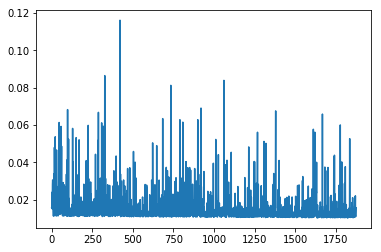

In [11]:
loss = rn18.lossData()
pt.plot(loss)

In [12]:
testAccuracy = imageSolver.calcAccuracy('test')

0  50  
Time to calculate  test  data accuracy:  198.84877800941467  seconds.
Accuracy:  0.9927  with data set size  10000


In [13]:
trainAccuracy = imageSolver.calcAccuracy('train')

0  50  100  150  200  250  300  350  400  450  
Time to calculate  train  data accuracy:  1211.8214211463928  seconds.
Accuracy:  0.9995333333333334  with data set size  60000
